In [5]:
import os
from pathlib import Path

# Move to repo root if notebook is inside notebooks/
HERE = Path.cwd()
if HERE.name == "notebooks":
    os.chdir(HERE.parent)

print("Now CWD:", Path.cwd())

Now CWD: /Users/samyuktareddy/Desktop/MOF Gas absorption


In [6]:
from pathlib import Path
import pandas as pd

OUT_DIR = Path("outputs/figures/00_overview")
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Saving figures to:", OUT_DIR.resolve())

Saving figures to: /Users/samyuktareddy/Desktop/MOF Gas absorption/outputs/figures/00_overview


In [7]:
from pathlib import Path
import json

counts = {}

# 1) MOFCSD total MOFs
mofcsd_path = Path("data/raw/MOFCSD.csv")
if mofcsd_path.exists():
    df_mof = pd.read_csv(mofcsd_path)
    counts["MOFCSD_total_MOFs"] = len(df_mof)
else:
    counts["MOFCSD_total_MOFs"] = None
    print("Missing:", mofcsd_path)

# 2) Labeled MOFs (from merged file)
labeled_path = Path("data/processed/MOFCSD_with_co2_labels.csv")
if labeled_path.exists():
    df_lab = pd.read_csv(labeled_path)
    counts["Labeled_MOFs_total"] = int(df_lab["co2_uptake"].notna().sum())
else:
    counts["Labeled_MOFs_total"] = None
    print("Missing:", labeled_path)

# 3) Split sizes
splits_path = Path("data/processed/splits_seed42.json")
if splits_path.exists():
    splits = json.loads(splits_path.read_text())
    counts["Train_labeled"] = len(splits["train"])
    counts["Val_labeled"] = len(splits["val"])
    counts["Test_labeled"] = len(splits["test"])
else:
    counts["Train_labeled"] = counts["Val_labeled"] = counts["Test_labeled"] = None
    print("Missing:", splits_path)

# 4) Graph coverage table existence (optional)
cov_path = Path("data/processed/labeled_coverage_by_threshold.csv")
counts["Has_coverage_table"] = cov_path.exists()

counts

{'MOFCSD_total_MOFs': 14296,
 'Labeled_MOFs_total': 363,
 'Train_labeled': 254,
 'Val_labeled': 54,
 'Test_labeled': 55,
 'Has_coverage_table': True}

In [4]:
import os
from pathlib import Path

print("CWD:", os.getcwd())
print("Files here:", list(Path(".").iterdir())[:10])


CWD: /Users/samyuktareddy/Desktop/MOF Gas absorption/notebooks
Files here: [PosixPath('03_graph_threshold_diagnostics.ipynb'), PosixPath('05_gnn_vs_shuffled.ipynb'), PosixPath('02_splits_and_fewshot.ipynb'), PosixPath('01_data_mapping_and_labels.ipynb'), PosixPath('06_summary_tables.ipynb'), PosixPath('00_overview_pipeline.ipynb'), PosixPath('outputs'), PosixPath('04_baselines.ipynb')]


In [8]:
print("=== Project Snapshot ===")
print(f"MOFCSD total MOFs: {counts['MOFCSD_total_MOFs']}")
print(f"CO2-labeled MOFs (CRAFTED overlap): {counts['Labeled_MOFs_total']}")
print(f"Split sizes (Train/Val/Test): {counts['Train_labeled']} / {counts['Val_labeled']} / {counts['Test_labeled']}")
print(f"Coverage-by-threshold table exists: {counts['Has_coverage_table']}")

=== Project Snapshot ===
MOFCSD total MOFs: 14296
CO2-labeled MOFs (CRAFTED overlap): 363
Split sizes (Train/Val/Test): 254 / 54 / 55
Coverage-by-threshold table exists: True


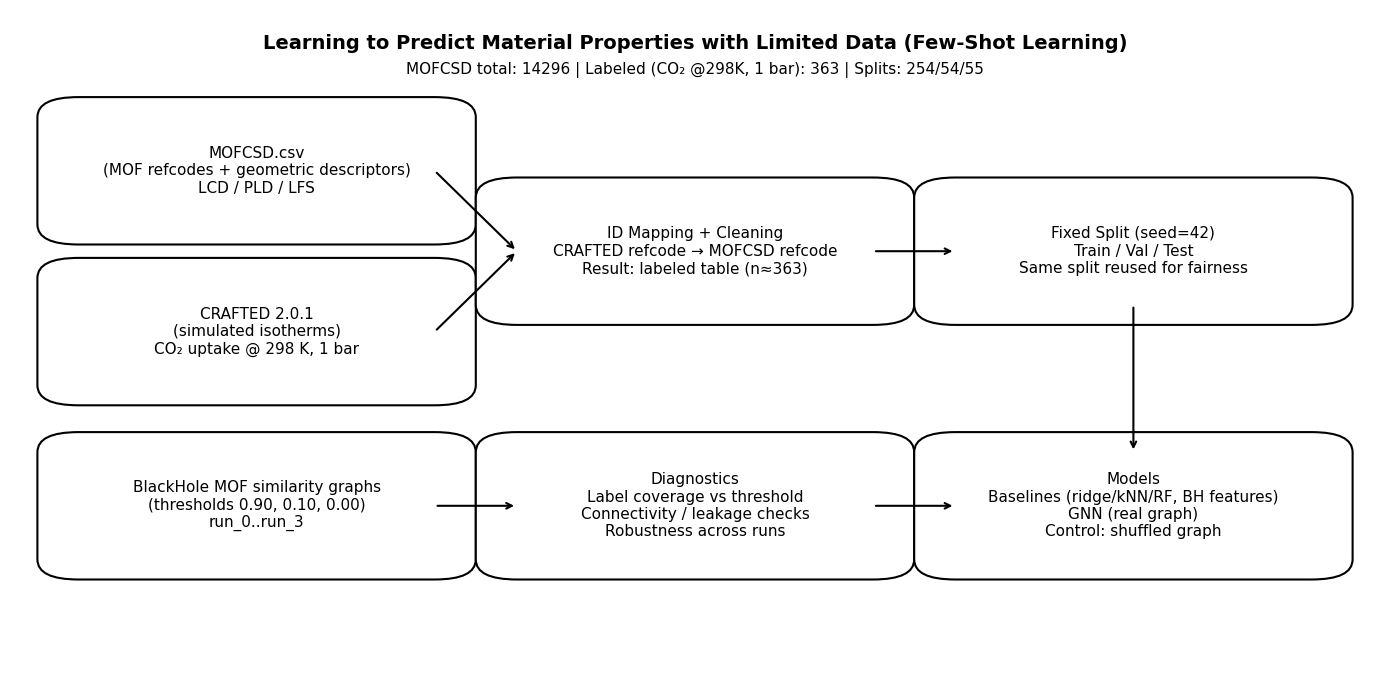

Saved: outputs/figures/00_overview/pipeline.png and outputs/figures/00_overview/pipeline.pdf


In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def add_box(ax, xy, w, h, text, fontsize=11):
    box = FancyBboxPatch(
        xy, w, h,
        boxstyle="round,pad=0.03,rounding_size=0.03",
        linewidth=1.5,
        facecolor="white"
    )
    ax.add_patch(box)
    ax.text(
        xy[0] + w/2, xy[1] + h/2,
        text, ha="center", va="center",
        fontsize=fontsize
    )

def add_arrow(ax, start, end):
    ax.annotate(
        "", xy=end, xytext=start,
        arrowprops=dict(arrowstyle="->", lw=1.5)
    )

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# Titles / counts
title = "Learning to Predict Material Properties with Limited Data (Few-Shot Learning)"
subtitle = (
    f"MOFCSD total: {counts['MOFCSD_total_MOFs']} | "
    f"Labeled (CO₂ @298K, 1 bar): {counts['Labeled_MOFs_total']} | "
    f"Splits: {counts['Train_labeled']}/{counts['Val_labeled']}/{counts['Test_labeled']}"
)
ax.text(0.5, 0.95, title, ha="center", va="center", fontsize=14, fontweight="bold")
ax.text(0.5, 0.91, subtitle, ha="center", va="center", fontsize=11)

# Boxes positions (x,y,w,h)
boxes = {
    "MOFCSD": (0.05, 0.68, 0.26, 0.16),
    "CRAFTED": (0.05, 0.44, 0.26, 0.16),
    "MAP": (0.37, 0.56, 0.26, 0.16),
    "SPLIT": (0.69, 0.56, 0.26, 0.16),
    "GRAPHS": (0.05, 0.18, 0.26, 0.16),
    "DIAG": (0.37, 0.18, 0.26, 0.16),
    "MODELS": (0.69, 0.18, 0.26, 0.16),
}

add_box(ax, boxes["MOFCSD"][:2], boxes["MOFCSD"][2], boxes["MOFCSD"][3],
        "MOFCSD.csv\n(MOF refcodes + geometric descriptors)\nLCD / PLD / LFS")

add_box(ax, boxes["CRAFTED"][:2], boxes["CRAFTED"][2], boxes["CRAFTED"][3],
        "CRAFTED 2.0.1\n(simulated isotherms)\nCO₂ uptake @ 298 K, 1 bar")

add_box(ax, boxes["MAP"][:2], boxes["MAP"][2], boxes["MAP"][3],
        "ID Mapping + Cleaning\nCRAFTED refcode → MOFCSD refcode\nResult: labeled table (n≈363)")

add_box(ax, boxes["SPLIT"][:2], boxes["SPLIT"][2], boxes["SPLIT"][3],
        "Fixed Split (seed=42)\nTrain / Val / Test\nSame split reused for fairness")

add_box(ax, boxes["GRAPHS"][:2], boxes["GRAPHS"][2], boxes["GRAPHS"][3],
        "BlackHole MOF similarity graphs\n(thresholds 0.90, 0.10, 0.00)\nrun_0..run_3")

add_box(ax, boxes["DIAG"][:2], boxes["DIAG"][2], boxes["DIAG"][3],
        "Diagnostics\nLabel coverage vs threshold\nConnectivity / leakage checks\nRobustness across runs")

add_box(ax, boxes["MODELS"][:2], boxes["MODELS"][2], boxes["MODELS"][3],
        "Models\nBaselines (ridge/kNN/RF, BH features)\nGNN (real graph)\nControl: shuffled graph")

# Arrows
add_arrow(ax, (0.31, 0.76), (0.37, 0.64))  # MOFCSD -> MAP
add_arrow(ax, (0.31, 0.52), (0.37, 0.64))  # CRAFTED -> MAP
add_arrow(ax, (0.63, 0.64), (0.69, 0.64))  # MAP -> SPLIT
add_arrow(ax, (0.31, 0.26), (0.37, 0.26))  # GRAPHS -> DIAG
add_arrow(ax, (0.63, 0.26), (0.69, 0.26))  # DIAG -> MODELS
add_arrow(ax, (0.82, 0.56), (0.82, 0.34))  # SPLIT down to MODELS

# Save
out_png = OUT_DIR / "pipeline.png"
out_pdf = OUT_DIR / "pipeline.pdf"
plt.tight_layout()
plt.savefig(out_png, dpi=200, bbox_inches="tight")
plt.savefig(out_pdf, bbox_inches="tight")
plt.show()

print("Saved:", out_png, "and", out_pdf)
